In [1]:
from nilm_analyzer.loaders import UKDALE_Loader
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
ukdale_data = UKDALE_Loader(data_path=r'C:\Users\44749\NILM\nilm_analyzer_EM401\UKDALE')

Fetching the meter_appliance mapping from UKDALE metadata: C:\Users\44749\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilm_analyzer\metadata\ukdale

Loading specified buildings: [1, 2, 3, 4, 5]
Dataset successfully loaded!


In [3]:
appliance_data = ukdale_data.get_appliance_data(appliance='dishwasher', houses=[5])

Loading data for appliance DISHWASHER ...
Fetching DISHWASHER data for House 5


In [4]:
appliance_data.resample(sampling_period= 6)

Resampling for house number:  5
sampling_period = 6s, window_limit = 30 samples, fill_value = 0.0

Updating data with resampled dataset...


In [5]:
#out = appliance_data.data[1]

In [6]:
#out.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\Load Profile Data\UK_h1_WM.csv')

In [7]:
appliance_data.get_activations(threshold_x=5, threshold_y=10, min_limit=10)

Extracting activations for House 5
Consumption Threshold is set to = 10
Time Delay Threshold is set to = 5 minutes
Estimating active durations of: dishwasher
Updating activations with durations when appliance is active (above threshold).


In [8]:
table = appliance_data.activations[5].sort_values(by='duration_in_minutes', ascending=True)
print(table)

        activity_start        activity_end  duration_in_minutes
0  2014-06-30 19:24:06 2014-06-30 19:34:18                 10.2
14 2014-07-19 13:56:06 2014-07-19 14:07:00                 10.9
50 2014-09-12 21:33:36 2014-09-12 21:45:36                 12.0
3  2014-07-03 09:04:06 2014-07-03 09:16:12                 12.1
27 2014-08-03 20:46:36 2014-08-03 20:59:12                 12.6
..                 ...                 ...                  ...
73 2014-11-08 11:44:48 2014-11-08 13:15:06                 90.3
56 2014-09-17 13:55:48 2014-09-17 15:28:12                 92.4
66 2014-10-20 13:19:24 2014-10-20 15:19:06                119.7
38 2014-08-27 12:03:06 2014-08-27 14:04:30                121.4
67 2014-10-22 19:41:12 2014-10-22 21:43:06                121.9

[76 rows x 3 columns]


In [9]:
type(table)

pandas.core.frame.DataFrame

In [10]:
#table.drop(table.index[810:-1], inplace = True)


In [11]:
#table.drop(table.index[-1], inplace = True)

In [12]:
#table.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Activations\UK_h1_activations.csv')

<Axes: title={'center': 'Part Day Load Profile of a Dishwasher - UKDALE House 5 - 25/10/2014'}, xlabel='Time', ylabel='Power [W]'>

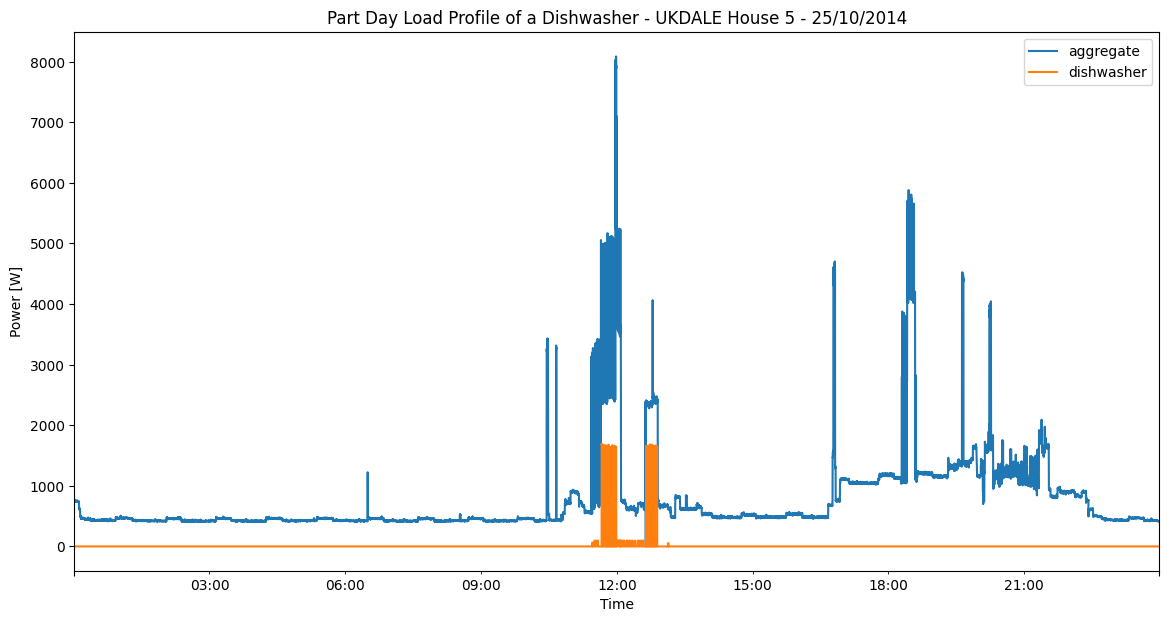

In [13]:
appliance_data.data[5].loc[' 2014-10-05 00:00:54':'2014-10-05 23:59:18'].plot(figsize=(14,7), xlabel= 'Time', ylabel=('Power [W]'), title=('Part Day Load Profile of a Dishwasher - UKDALE House 5 - 25/10/2014'))


In [14]:
#appliance_data.subset_data(no_of_days=1)

In [15]:
#a = appliance_data.data

In [16]:
#a.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Data Evaluation\test.csv', index=False)